## Homework CUDA

Made by Marina Grigoreva, Stefano Amalberti, Sofie Othilie Dregi

In [1]:
!uname -a && cat /etc/*release

Linux 19ab95b3a17d 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"
PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [2]:
!pwd
!ls -la

/content
total 24
drwxr-xr-x 1 root root 4096 Jan  6 16:55 .
drwxr-xr-x 1 root root 4096 Jan  6 16:53 ..
drwxr-xr-x 4 root root 4096 Jan  2 14:18 .config
-rw-r--r-- 1 root root 6051 Jan  6 16:55 heat.cu
drwxr-xr-x 1 root root 4096 Jan  2 14:19 sample_data


In [3]:
!nvidia-smi

Mon Jan  6 16:55:17 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
!nvcc -o devicequery devicequery.cu
!./devicequery

./devicequery Starting...

 CUDA Device Query (Runtime API) version (CUDART static linking)

Detected 1 CUDA Capable device(s)

Device 0: "Tesla T4"
  CUDA Driver Version / Runtime Version          12.2 / 12.2
  CUDA Capability Major/Minor version number:    7.5
  Total amount of global memory:                 15102 MBytes (15835660288 bytes)
  (040) Multiprocessors, (064) CUDA Cores/MP:    2560 CUDA Cores
  GPU Max Clock rate:                            1590 MHz (1.59 GHz)
  Memory Clock rate:                             5001 Mhz
  Memory Bus Width:                              256-bit
  L2 Cache Size:                                 4194304 bytes
  Maximum Texture Dimension Size (x,y,z)         1D=(131072), 2D=(131072, 65536), 3D=(16384, 16384, 16384)
  Maximum Layered 1D Texture Size, (num) layers  1D=(32768), 2048 layers
  Maximum Layered 2D Texture Size, (num) layers  2D=(32768, 32768), 2048 layers
  Total amount of constant memory:               65536 bytes
  Total amount of shar

In [13]:
!nvcc -o heat heat.cu

In [25]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 8
==12630== NVPROF is profiling process 12630, command: ./heat
CPU Execution Time: 49.491448 seconds
GPU Execution Time: 0.249541 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 8
CPU Time: 49.491448 seconds
GPU Time: 0.249541 seconds
Speedup: 198.33x
Max Error: 0.000015
Speedup: 198.33x
==12630== Profiling application: ./heat
==12630== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   86.83%  210.46ms       500  420.92us  403.77us  431.48us  step_kernel_mod(int, int, float, float*, float*)
                    6.58%  15.958ms         2  7.9789ms  7.7191ms  8.2388ms  [CUDA memcpy HtoD]
                    6.58%  15.951ms         2  7.9755ms  7.9666ms  7.9843ms  [CUDA memcpy DtoH]
      API calls:   48.43%  212.59ms       500  425.17us  407.67us  4

### Let's now experiment with different numbers

In [15]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 32
==3585== NVPROF is profiling process 3585, command: ./heat
CPU Execution Time: 50.221938 seconds
GPU Execution Time: 0.289298 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 32
CPU Time: 50.221938 seconds
GPU Time: 0.289298 seconds
Speedup: 173.60x
Max Error: 0.000015
Speedup: 173.60x
==3585== Profiling application: ./heat
==3585== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   87.47%  240.00ms       500  480.00us  359.87us  580.76us  step_kernel_mod(int, int, float, float*, float*)
                    6.48%  17.780ms         2  8.8902ms  8.8501ms  8.9303ms  [CUDA memcpy DtoH]
                    6.05%  16.606ms         2  8.3028ms  7.8882ms  8.7174ms  [CUDA memcpy HtoD]
      API calls:   51.04%  245.27ms       500  490.53us  352.53us  2.2

In [16]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000 
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 128
==3868== NVPROF is profiling process 3868, command: ./heat
CPU Execution Time: 49.189514 seconds
GPU Execution Time: 0.032516 seconds
Problem! The Max Error of 14.47116 is NOT within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 128
CPU Time: 49.189514 seconds
GPU Time: 0.032516 seconds
Speedup: 1512.80x
Max Error: 14.471155
Speedup: 1512.80x
==3868== Profiling application: ./heat
==3868== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.70%  15.452ms         2  7.7258ms  7.6843ms  7.7674ms  [CUDA memcpy HtoD]
                   49.30%  15.026ms         2  7.5131ms  7.5088ms  7.5174ms  [CUDA memcpy DtoH]
      API calls:   84.45%  186.54ms         2  93.270ms  128.96us  186.41ms  cudaMalloc
                   14.28%  31.554ms         4  7.8885ms  7.7736ms  8.0173ms  cudaMemcpy


In [17]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 4
==4877== NVPROF is profiling process 4877, command: ./heat
CPU Execution Time: 49.453904 seconds
GPU Execution Time: 0.625366 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 4
CPU Time: 49.453904 seconds
GPU Time: 0.625366 seconds
Speedup: 79.08x
Max Error: 0.000015
Speedup: 79.08x
==4877== Profiling application: ./heat
==4877== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   94.96%  586.53ms       500  1.1731ms  820.47us  1.8248ms  step_kernel_mod(int, int, float, float*, float*)
                    2.53%  15.634ms         2  7.8171ms  7.7789ms  7.8553ms  [CUDA memcpy DtoH]
                    2.51%  15.496ms         2  7.7480ms  7.7012ms  7.7949ms  [CUDA memcpy HtoD]
      API calls:   71.57%  588.53ms       500  1.1771ms  824.39us  1.8288m

In [18]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 2
==5148== NVPROF is profiling process 5148, command: ./heat
CPU Execution Time: 49.092927 seconds
GPU Execution Time: 1.558098 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 2
CPU Time: 49.092927 seconds
GPU Time: 1.558098 seconds
Speedup: 31.51x
Max Error: 0.000015
Speedup: 31.51x
==5148== Profiling application: ./heat
==5148== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   98.01%  1.51875s       500  3.0375ms  2.6711ms  7.4633ms  step_kernel_mod(int, int, float, float*, float*)
                    1.00%  15.474ms         2  7.7370ms  7.6921ms  7.7818ms  [CUDA memcpy DtoH]
                    0.99%  15.309ms         2  7.6543ms  7.6251ms  7.6834ms  [CUDA memcpy HtoD]
      API calls:   86.59%  1.52072s       500  3.0414ms  2.6741ms  7.4739m

In [19]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 1
==5645== NVPROF is profiling process 5645, command: ./heat
CPU Execution Time: 49.439438 seconds
GPU Execution Time: 5.280854 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 1
CPU Time: 49.439438 seconds
GPU Time: 5.280854 seconds
Speedup: 9.36x
Max Error: 0.000015
Speedup: 9.36x
==5645== Profiling application: ./heat
==5645== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.34%  5.23329s       500  10.467ms  9.9723ms  30.484ms  step_kernel_mod(int, int, float, float*, float*)
                    0.36%  18.943ms         2  9.4714ms  9.4500ms  9.4928ms  [CUDA memcpy HtoD]
                    0.30%  15.805ms         2  7.9023ms  7.8300ms  7.9746ms  [CUDA memcpy DtoH]
      API calls:   95.62%  5.23628s       500  10.473ms  9.9752ms  30.499ms 

In [20]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 16
==5924== NVPROF is profiling process 5924, command: ./heat
CPU Execution Time: 49.403506 seconds
GPU Execution Time: 0.285712 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 16
CPU Time: 49.403506 seconds
GPU Time: 0.285712 seconds
Speedup: 172.91x
Max Error: 0.000015
Speedup: 172.91x
==5924== Profiling application: ./heat
==5924== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   86.92%  231.06ms       500  462.13us  459.64us  463.74us  step_kernel_mod(int, int, float, float*, float*)
                    6.66%  17.703ms         2  8.8515ms  8.6293ms  9.0738ms  [CUDA memcpy DtoH]
                    6.42%  17.076ms         2  8.5381ms  8.3061ms  8.7701ms  [CUDA memcpy HtoD]
      API calls:   48.50%  241.61ms       500  483.21us  448.18us  3.8

In [22]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 256
==7038== NVPROF is profiling process 7038, command: ./heat
CPU Execution Time: 53.284083 seconds
GPU Execution Time: 0.036227 seconds
Problem! The Max Error of 14.47116 is NOT within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 256
CPU Time: 53.284083 seconds
GPU Time: 0.036227 seconds
Speedup: 1470.85x
Max Error: 14.471155
Speedup: 1470.85x
==7038== Profiling application: ./heat
==7038== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.04%  17.028ms         2  8.5141ms  8.4789ms  8.5494ms  [CUDA memcpy HtoD]
                   49.96%  16.999ms         2  8.4994ms  8.4231ms  8.5756ms  [CUDA memcpy DtoH]
      API calls:   83.38%  191.09ms         2  95.544ms  127.30us  190.96ms  cudaMalloc
                   15.36%  35.192ms         4  8.7980ms  8.7176ms  8.8860ms  cudaMemcpy
 

In [21]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 3000 3000 
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 64
==6463== NVPROF is profiling process 6463, command: ./heat
CPU Execution Time: 52.596692 seconds
GPU Execution Time: 0.035816 seconds
Problem! The Max Error of 14.47116 is NOT within acceptable bounds.
Grid: 3000x3000, Timesteps: 500, Threads: 64
CPU Time: 52.596692 seconds
GPU Time: 0.035816 seconds
Speedup: 1468.51x
Max Error: 14.471155
Speedup: 1468.51x
==6463== Profiling application: ./heat
==6463== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.74%  16.736ms         2  8.3679ms  8.3451ms  8.3907ms  [CUDA memcpy DtoH]
                   49.26%  16.246ms         2  8.1231ms  8.0600ms  8.1863ms  [CUDA memcpy HtoD]
      API calls:   83.81%  192.22ms         2  96.109ms  197.10us  192.02ms  cudaMalloc
                   14.91%  34.205ms         4  8.5514ms  8.3211ms  8.7032ms  cudaMemcpy
  

### Plot GPU Speedup vs Grid Size

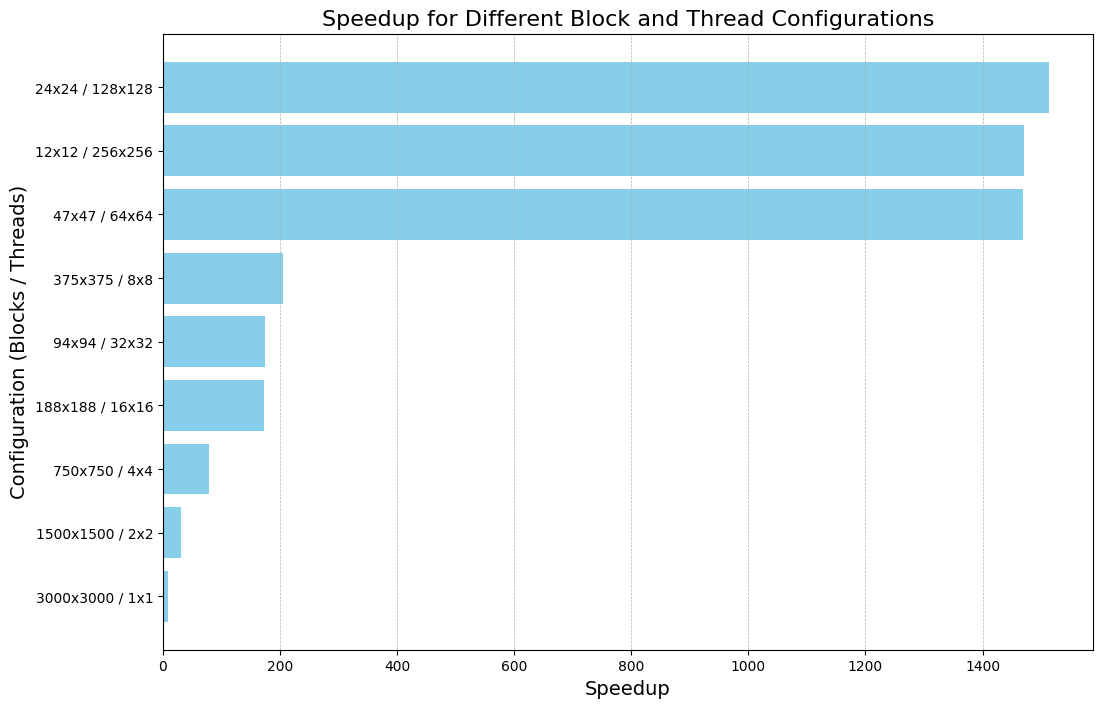

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df["Configuration"] = df["Blocks.x"].astype(str) + "x" + df["Blocks.x"].astype(str) + " / " + df["Threads.x"].astype(str) + "x" + df["Threads.x"].astype(str)

df = df.sort_values("Speedup")

plt.figure(figsize=(12, 8))
plt.barh(df[df["Grid.x"] == 3000]["Configuration"], df[df["Grid.x"] == 3000]["Speedup"], color="skyblue")
plt.xlabel("Speedup", fontsize=14)
plt.ylabel("Configuration (Blocks / Threads)", fontsize=14)
plt.title("Speedup for Different Block and Thread Configurations", fontsize=16)
plt.grid(True, axis="x", linestyle="--", linewidth=0.5)
plt.savefig('speedup_3000.png', dpi=300, bbox_inches='tight')
plt.show()

### Let's now perform tests with different grid sizes

Grid sizes will be 5000x5000 and 7000x7000 with 500 timesteps

In [41]:
!nvcc -o heat heat.cu

In [44]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 1
==43882== NVPROF is profiling process 43882, command: ./heat
CPU Execution Time: 136.995196 seconds
GPU Execution Time: 14.239159 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 1
CPU Time: 136.995196 seconds
GPU Time: 14.239159 seconds
Speedup: 9.62x
Max Error: 0.000015
Speedup: 9.62x
==43882== Profiling application: ./heat
==43882== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.29%  14.1221s       500  28.244ms  27.732ms  84.555ms  step_kernel_mod(int, int, float, float*, float*)
                    0.35%  50.272ms         2  25.136ms  24.113ms  26.159ms  [CUDA memcpy HtoD]
                    0.35%  50.001ms         2  25.000ms  24.978ms  25.023ms  [CUDA memcpy DtoH]
      API calls:   97.94%  14.1268s       500  28.254ms  27.739ms  8

In [45]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 2
==44570== NVPROF is profiling process 44570, command: ./heat
CPU Execution Time: 138.030969 seconds
GPU Execution Time: 3.971554 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 2
CPU Time: 138.030969 seconds
GPU Time: 3.971554 seconds
Speedup: 34.75x
Max Error: 0.000015
Speedup: 34.75x
==44570== Profiling application: ./heat
==44570== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   97.68%  3.86986s       500  7.7397ms  7.3880ms  20.593ms  step_kernel_mod(int, int, float, float*, float*)
                    1.16%  46.100ms         2  23.050ms  23.047ms  23.053ms  [CUDA memcpy DtoH]
                    1.15%  45.728ms         2  22.864ms  22.814ms  22.914ms  [CUDA memcpy HtoD]
      API calls:   92.96%  3.87197s       500  7.7439ms  7.3899ms  2

In [46]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 4
==45258== NVPROF is profiling process 45258, command: ./heat
CPU Execution Time: 137.747549 seconds
GPU Execution Time: 1.432034 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 4
CPU Time: 137.747549 seconds
GPU Time: 1.432034 seconds
Speedup: 96.19x
Max Error: 0.000015
Speedup: 96.19x
==45258== Profiling application: ./heat
==45258== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   93.57%  1.33257s       500  2.6651ms  2.3574ms  4.9436ms  step_kernel_mod(int, int, float, float*, float*)
                    3.24%  46.096ms         2  23.048ms  22.843ms  23.254ms  [CUDA memcpy DtoH]
                    3.19%  45.459ms         2  22.729ms  22.693ms  22.765ms  [CUDA memcpy HtoD]
      API calls:   82.34%  1.33443s       500  2.6689ms  2.3607ms  4

In [47]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 8
==45903== NVPROF is profiling process 45903, command: ./heat
CPU Execution Time: 137.621560 seconds
GPU Execution Time: 0.604880 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 8
CPU Time: 137.621560 seconds
GPU Time: 0.604880 seconds
Speedup: 227.52x
Max Error: 0.000015
Speedup: 227.52x
==45903== Profiling application: ./heat
==45903== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   83.81%  499.69ms       500  999.37us  908.06us  1.2197ms  step_kernel_mod(int, int, float, float*, float*)
                    8.16%  48.650ms         2  24.325ms  23.176ms  25.474ms  [CUDA memcpy DtoH]
                    8.03%  47.847ms         2  23.923ms  23.348ms  24.499ms  [CUDA memcpy HtoD]
      API calls:   63.86%  502.53ms       500  1.0051ms  862.58us 

In [48]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 16
==46550== NVPROF is profiling process 46550, command: ./heat
CPU Execution Time: 136.586112 seconds
GPU Execution Time: 0.621719 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 16
CPU Time: 136.586112 seconds
GPU Time: 0.621719 seconds
Speedup: 219.69x
Max Error: 0.000015
Speedup: 219.69x
==46550== Profiling application: ./heat
==46550== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   85.33%  524.17ms       500  1.0483ms  900.05us  1.2804ms  step_kernel_mod(int, int, float, float*, float*)
                    7.35%  45.146ms         2  22.573ms  22.427ms  22.719ms  [CUDA memcpy HtoD]
                    7.32%  44.936ms         2  22.468ms  22.448ms  22.488ms  [CUDA memcpy DtoH]
      API calls:   64.89%  526.22ms       500  1.0524ms  904.29u

In [49]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 32
==47191== NVPROF is profiling process 47191, command: ./heat
CPU Execution Time: 139.238584 seconds
GPU Execution Time: 0.664949 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 32
CPU Time: 139.238584 seconds
GPU Time: 0.664949 seconds
Speedup: 209.40x
Max Error: 0.000015
Speedup: 209.40x
==47191== Profiling application: ./heat
==47191== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   85.24%  554.94ms       500  1.1099ms  963.22us  1.6154ms  step_kernel_mod(int, int, float, float*, float*)
                    7.48%  48.709ms         2  24.354ms  24.276ms  24.433ms  [CUDA memcpy DtoH]
                    7.28%  47.381ms         2  23.691ms  23.385ms  23.996ms  [CUDA memcpy HtoD]
      API calls:   65.89%  560.69ms       500  1.1214ms  966.60u

In [50]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 64
==48410== NVPROF is profiling process 48410, command: ./heat
CPU Execution Time: 143.049672 seconds
GPU Execution Time: 0.101716 seconds
Problem! The Max Error of 14.59048 is NOT within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 64
CPU Time: 143.049672 seconds
GPU Time: 0.101716 seconds
Speedup: 1406.36x
Max Error: 14.590479
Speedup: 1406.36x
==48410== Profiling application: ./heat
==48410== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.62%  49.980ms         2  24.990ms  24.410ms  25.570ms  [CUDA memcpy DtoH]
                   49.38%  48.751ms         2  24.375ms  24.100ms  24.651ms  [CUDA memcpy HtoD]
      API calls:   67.10%  210.58ms         2  105.29ms  265.01us  210.32ms  cudaMalloc
                   31.87%  100.03ms         4  25.006ms  24.454ms  25.879ms  cudaMemc

In [51]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 128
==49225== NVPROF is profiling process 49225, command: ./heat
CPU Execution Time: 140.571269 seconds
GPU Execution Time: 0.098270 seconds
Problem! The Max Error of 14.59048 is NOT within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 128
CPU Time: 140.571269 seconds
GPU Time: 0.098270 seconds
Speedup: 1430.46x
Max Error: 14.590479
Speedup: 1430.46x
==49225== Profiling application: ./heat
==49225== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.17%  48.182ms         2  24.091ms  23.872ms  24.310ms  [CUDA memcpy DtoH]
                   49.83%  47.853ms         2  23.927ms  23.708ms  24.145ms  [CUDA memcpy HtoD]
      API calls:   65.42%  188.71ms         2  94.354ms  222.17us  188.49ms  cudaMalloc
                   33.73%  97.274ms         4  24.319ms  24.032ms  24.628ms  cudaMe

In [52]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 5000 5000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 256
==49892== NVPROF is profiling process 49892, command: ./heat
CPU Execution Time: 139.392688 seconds
GPU Execution Time: 0.099234 seconds
Problem! The Max Error of 14.59048 is NOT within acceptable bounds.
Grid: 5000x5000, Timesteps: 500, Threads: 256
CPU Time: 139.392688 seconds
GPU Time: 0.099234 seconds
Speedup: 1404.69x
Max Error: 14.590479
Speedup: 1404.69x
==49892== Profiling application: ./heat
==49892== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.27%  48.678ms         2  24.339ms  24.049ms  24.629ms  [CUDA memcpy DtoH]
                   49.73%  48.159ms         2  24.079ms  24.042ms  24.117ms  [CUDA memcpy HtoD]
      API calls:   67.80%  214.16ms         2  107.08ms  298.55us  213.86ms  cudaMalloc
                   31.07%  98.147ms         4  24.537ms  24.323ms  24.988ms  cudaMe

### Plot GPU Speedup vs Grid Size

In [54]:
df = pd.read_csv("results.csv", names=["Grid.x", "Grid.y", "Timesteps", "Threads.x", "Blocks.x", "CPU Time", "GPU Time", "Speedup"])
df = df[["Grid.x", "Grid.y", "Timesteps", "Threads.x", "Blocks.x", "CPU Time", "GPU Time", "Speedup"]]
df = df.sort_values(by=["Grid.x", "Threads.x"], ignore_index=True)

df

,Grid.x,Grid.y,Timesteps,Threads.x,Blocks.x,CPU Time,GPU Time,Speedup
0,3000,3000,500,1,3000,49.439438,5.280854,9.36
1,3000,3000,500,2,1500,49.092927,1.558098,31.51
2,3000,3000,500,4,750,49.453904,0.625366,79.08
3,3000,3000,500,8,375,50.010401,0.244406,204.62
4,3000,3000,500,16,188,49.403506,0.285712,172.91
5,3000,3000,500,32,94,50.221938,0.289298,173.60
6,3000,3000,500,64,47,52.596692,0.035816,1468.51
7,3000,3000,500,128,24,49.189514,0.032516,1512.80
8,3000,3000,500,256,12,53.284083,0.036227,1470.85
9,5000,5000,500,1,5000,136.995196,14.239159,9.62


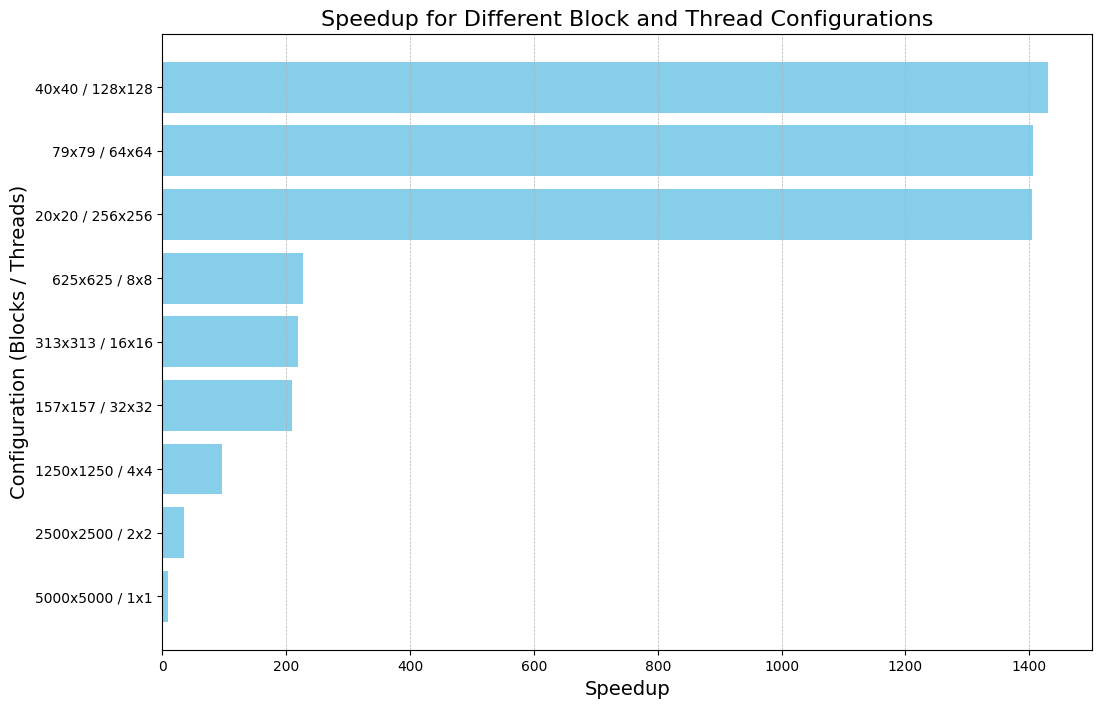

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df["Configuration"] = df["Blocks.x"].astype(str) + "x" + df["Blocks.x"].astype(str) + " / " + df["Threads.x"].astype(str) + "x" + df["Threads.x"].astype(str)

df = df.sort_values("Speedup")

plt.figure(figsize=(12, 8))
plt.barh(df[df["Grid.x"] == 5000]["Configuration"], df[df["Grid.x"] == 5000]["Speedup"], color="skyblue")
plt.xlabel("Speedup", fontsize=14)
plt.ylabel("Configuration (Blocks / Threads)", fontsize=14)
plt.title("Speedup for Different Block and Thread Configurations", fontsize=16)
plt.grid(True, axis="x", linestyle="--", linewidth=0.5)
plt.savefig('speedup_5000.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
!nvcc -o heat heat.cu

In [64]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 1
==57826== NVPROF is profiling process 57826, command: ./heat
CPU Execution Time: 275.621983 seconds
GPU Execution Time: 27.908386 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 1
CPU Time: 275.621983 seconds
GPU Time: 27.908386 seconds
Speedup: 9.88x
Max Error: 0.000015
Speedup: 9.88x
==57826== Profiling application: ./heat
==57826== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   99.29%  27.6814s       500  55.363ms  54.754ms  155.69ms  step_kernel_mod(int, int, float, float*, float*)
                    0.36%  99.321ms         2  49.660ms  49.275ms  50.046ms  [CUDA memcpy DtoH]
                    0.35%  97.253ms         2  48.626ms  48.185ms  49.068ms  [CUDA memcpy HtoD]
      API calls:   98.59%  27.6904s       500  55.381ms  54.760ms  1

In [65]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 2
==59161== NVPROF is profiling process 59161, command: ./heat
CPU Execution Time: 275.101138 seconds
GPU Execution Time: 7.844023 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 2
CPU Time: 275.101138 seconds
GPU Time: 7.844023 seconds
Speedup: 35.07x
Max Error: 0.000015
Speedup: 35.07x
==59161== Profiling application: ./heat
==59161== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   97.50%  7.62546s       500  15.251ms  14.739ms  40.212ms  step_kernel_mod(int, int, float, float*, float*)
                    1.27%  99.403ms         2  49.702ms  49.525ms  49.879ms  [CUDA memcpy DtoH]
                    1.23%  96.473ms         2  48.237ms  47.941ms  48.532ms  [CUDA memcpy HtoD]
      API calls:   95.04%  7.63478s       500  15.270ms  14.742ms  4

In [66]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 4
==60446== NVPROF is profiling process 60446, command: ./heat
CPU Execution Time: 273.853466 seconds
GPU Execution Time: 2.720917 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 4
CPU Time: 273.853466 seconds
GPU Time: 2.720917 seconds
Speedup: 100.65x
Max Error: 0.000015
Speedup: 100.65x
==60446== Profiling application: ./heat
==60446== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   92.72%  2.51362s       500  5.0272ms  4.6711ms  9.6981ms  step_kernel_mod(int, int, float, float*, float*)
                    3.66%  99.343ms         2  49.672ms  49.350ms  49.993ms  [CUDA memcpy DtoH]
                    3.62%  98.103ms         2  49.052ms  48.620ms  49.483ms  [CUDA memcpy HtoD]
      API calls:   84.87%  2.51603s       500  5.0321ms  4.6744ms 

In [67]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 8
==61697== NVPROF is profiling process 61697, command: ./heat
CPU Execution Time: 275.291769 seconds
GPU Execution Time: 1.205876 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 8
CPU Time: 275.291769 seconds
GPU Time: 1.205876 seconds
Speedup: 228.29x
Max Error: 0.000015
Speedup: 228.29x
==61697== Profiling application: ./heat
==61697== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   83.38%  998.23ms       500  1.9965ms  1.8586ms  2.3605ms  step_kernel_mod(int, int, float, float*, float*)
                    8.40%  100.61ms         2  50.306ms  49.815ms  50.796ms  [CUDA memcpy DtoH]
                    8.22%  98.387ms         2  49.194ms  49.182ms  49.206ms  [CUDA memcpy HtoD]
      API calls:   71.50%  1.00057s       500  2.0011ms  1.8506ms 

In [68]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 16
==62938== NVPROF is profiling process 62938, command: ./heat
CPU Execution Time: 273.238861 seconds
GPU Execution Time: 1.148010 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 16
CPU Time: 273.238861 seconds
GPU Time: 1.148010 seconds
Speedup: 238.01x
Max Error: 0.000015
Speedup: 238.01x
==62938== Profiling application: ./heat
==62938== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   82.81%  943.68ms       500  1.8874ms  1.7785ms  2.5157ms  step_kernel_mod(int, int, float, float*, float*)
                    8.64%  98.480ms         2  49.240ms  49.204ms  49.276ms  [CUDA memcpy DtoH]
                    8.55%  97.387ms         2  48.694ms  48.611ms  48.776ms  [CUDA memcpy HtoD]
      API calls:   70.46%  945.76ms       500  1.8915ms  1.7825m

In [69]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 32
==64209== NVPROF is profiling process 64209, command: ./heat
CPU Execution Time: 272.673269 seconds
GPU Execution Time: 1.245019 seconds
The Max Error of 0.00002 is within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 32
CPU Time: 272.673269 seconds
GPU Time: 1.245019 seconds
Speedup: 219.01x
Max Error: 0.000015
Speedup: 219.01x
==64209== Profiling application: ./heat
==64209== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   83.63%  1.03401s       500  2.0680ms  1.9218ms  3.1457ms  step_kernel_mod(int, int, float, float*, float*)
                    8.19%  101.28ms         2  50.641ms  50.521ms  50.761ms  [CUDA memcpy DtoH]
                    8.18%  101.19ms         2  50.595ms  50.311ms  50.878ms  [CUDA memcpy HtoD]
      API calls:   70.10%  1.03626s       500  2.0725ms  1.9245m

In [70]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000 
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 64
==65446== NVPROF is profiling process 65446, command: ./heat
CPU Execution Time: 275.615868 seconds
GPU Execution Time: 0.208555 seconds
Problem! The Max Error of 14.42443 is NOT within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 64
CPU Time: 275.615868 seconds
GPU Time: 0.208555 seconds
Speedup: 1321.55x
Max Error: 14.424430
Speedup: 1321.55x
==65446== Profiling application: ./heat
==65446== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.46%  104.04ms         2  52.019ms  52.003ms  52.036ms  [CUDA memcpy DtoH]
                   49.54%  102.13ms         2  51.065ms  50.925ms  51.205ms  [CUDA memcpy HtoD]
      API calls:   52.01%  207.54ms         4  51.885ms  51.207ms  52.426ms  cudaMemcpy
                   47.07%  187.81ms         2  93.905ms  243.96us  187.57ms  cudaMal

In [71]:
!nvprof ./heat

Enter grid dimensions (ni, nj): 7000 7000
Enter number of timesteps: 500
Enter number of threads per block (e.g., 16): 128
==66821== NVPROF is profiling process 66821, command: ./heat
CPU Execution Time: 272.625665 seconds
GPU Execution Time: 0.209482 seconds
Problem! The Max Error of 14.42443 is NOT within acceptable bounds.
Grid: 7000x7000, Timesteps: 500, Threads: 128
CPU Time: 272.625665 seconds
GPU Time: 0.209482 seconds
Speedup: 1301.43x
Max Error: 14.424430
Speedup: 1301.43x
==66821== Profiling application: ./heat
==66821== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   50.30%  104.16ms         2  52.080ms  52.040ms  52.121ms  [CUDA memcpy DtoH]
                   49.70%  102.93ms         2  51.464ms  51.409ms  51.519ms  [CUDA memcpy HtoD]
      API calls:   51.27%  223.32ms         2  111.66ms  657.15us  222.66ms  cudaMalloc
                   47.86%  208.44ms         4  52.110ms  51.728ms  52.494ms  cudaMe

### Plot GPU Speedup vs Grid Size

In [9]:
df = pd.read_csv("results.csv", names=["Grid.x", "Grid.y", "Timesteps", "Threads.x", "Blocks.x", "CPU Time", "GPU Time", "Speedup"])
df = df[["Grid.x", "Grid.y", "Timesteps", "Threads.x", "Blocks.x", "CPU Time", "GPU Time", "Speedup"]]
df = df.sort_values(by=["Grid.x", "Threads.x"], ignore_index=True)

df

,Grid.x,Grid.y,Timesteps,Threads.x,Blocks.x,CPU Time,GPU Time,Speedup
0,3000,3000,500,1,3000,49.439438,5.280854,9.36
1,3000,3000,500,2,1500,49.092927,1.558098,31.51
2,3000,3000,500,4,750,49.453904,0.625366,79.08
3,3000,3000,500,8,375,50.010401,0.244406,204.62
4,3000,3000,500,16,188,49.403506,0.285712,172.91
5,3000,3000,500,32,94,50.221938,0.289298,173.60
6,3000,3000,500,64,47,52.596692,0.035816,1468.51
7,3000,3000,500,128,24,49.189514,0.032516,1512.80
8,3000,3000,500,256,12,53.284083,0.036227,1470.85
9,5000,5000,500,1,5000,136.995196,14.239159,9.62


In [11]:
df = df[df["GPU Time"] != 27.908386]

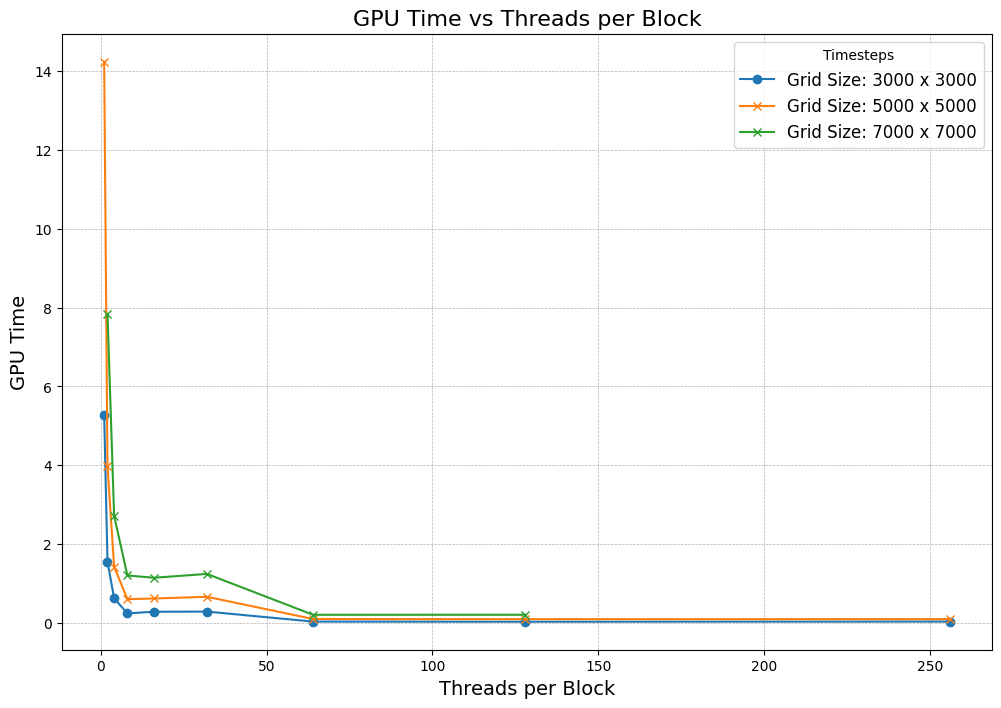

In [12]:
plt.figure(figsize=(12, 8))

plt.plot(
    df[df["Grid.x"] == 3000]["Threads.x"],
    df[df["Grid.x"] == 3000]["GPU Time"],
    marker='o',
    label=f"Grid Size: {3000} x {3000}"
)

plt.plot(
    df[df["Grid.x"] == 5000]["Threads.x"],
    df[df["Grid.x"] == 5000]["GPU Time"],
    marker='x',
    label=f"Grid Size: {5000} x {5000}"
)

plt.plot(
    df[df["Grid.x"] == 7000]["Threads.x"],
    df[df["Grid.x"] == 7000]["GPU Time"],
    marker='x',
    label=f"Grid Size: {7000} x {7000}"
)

plt.xlabel("Threads per Block", fontsize=14)
plt.ylabel("GPU Time", fontsize=14)
plt.title("GPU Time vs Threads per Block", fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Timesteps", fontsize=12)
plt.savefig('time.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-13-beb679ae76f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Configuration"] = df["Blocks.x"].astype(str) + "x" + df["Blocks.x"].astype(str) + " / " + df["Threads.x"].astype(str) + "x" + df["Threads.x"].astype(str)


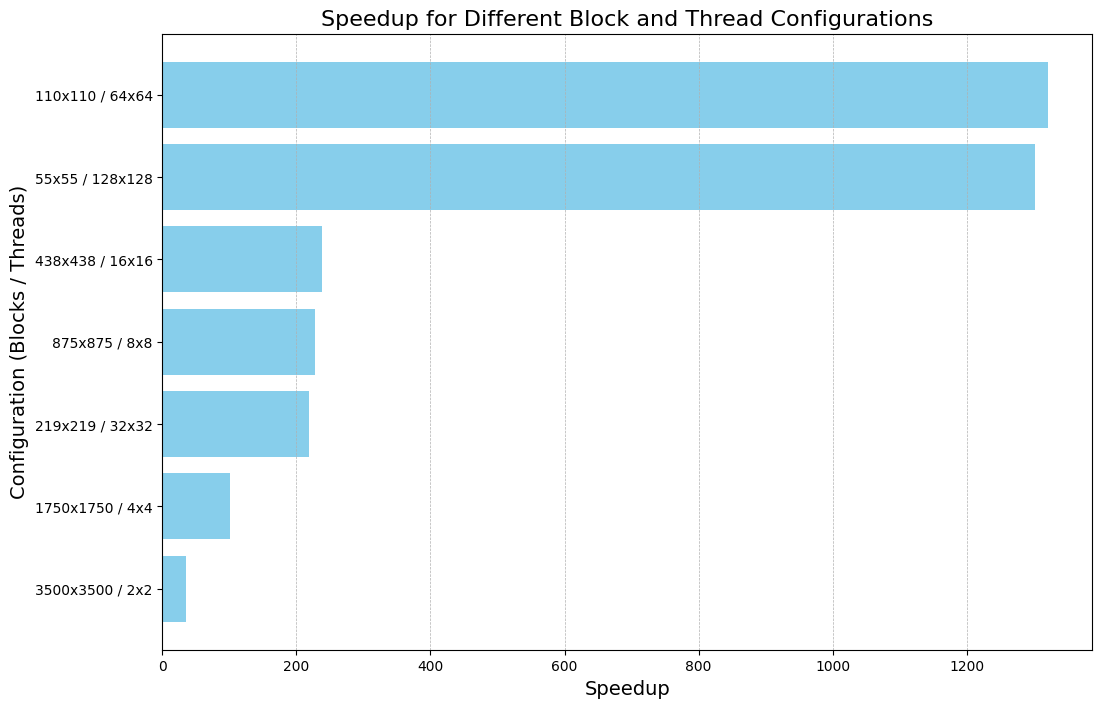

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df["Configuration"] = df["Blocks.x"].astype(str) + "x" + df["Blocks.x"].astype(str) + " / " + df["Threads.x"].astype(str) + "x" + df["Threads.x"].astype(str)

df = df.sort_values("Speedup")

plt.figure(figsize=(12, 8))
plt.barh(df[df["Grid.x"] == 7000]["Configuration"], df[df["Grid.x"] == 7000]["Speedup"], color="skyblue")
plt.xlabel("Speedup", fontsize=14)
plt.ylabel("Configuration (Blocks / Threads)", fontsize=14)
plt.title("Speedup for Different Block and Thread Configurations", fontsize=16)
plt.grid(True, axis="x", linestyle="--", linewidth=0.5)
plt.savefig('speedup_7000.png', dpi=300, bbox_inches='tight')
plt.show()